<a href="https://colab.research.google.com/github/anisbagwan/us-election-2016-eda/blob/main/US_Elections_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing important Libraries

import pandas as pd                     # To bring data analysis tools and libraries
import numpy as np                      # To perform numerical/mathematical operation on array
import matplotlib.pyplot as plt         # For plotting data
import seaborn as sns                   # For statistical graphics

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the dataset

df =pd.read_csv('/content/drive/MyDrive/Coursera Applied Plotting Charting/us-election-2016-results-by-county.csv')

In [20]:
df.head(5)

,StateCode,StateName,CountyFips,CountyName,CountyTotalVote,Party,Candidate,VoteCount
0,AK,alaska,2000,Alaska,246588,GOP,Trump,130415
1,AL,alabama,1087,Macon,8748,GOP,Trump,1394
2,AL,alabama,1131,Wilcox,6095,GOP,Trump,1737
3,AL,alabama,1037,Coosa,5223,GOP,Trump,3376
4,AL,alabama,1009,Blount,25384,GOP,Trump,22808


In [4]:
# checking the unique values 
df.nunique()

StateCode            51
StateName            51
CountyFips         3113
CountyName         1838
CountyTotalVote    2962
Party                 5
Candidate             5
VoteCount          6112
dtype: int64

In [5]:
# Display shape of data
print(f'Our dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

#Display column names
print(f'Our dataset has following columns -\n {list(df.columns)}')

Our dataset has 15565 rows and 8 columns.
Our dataset has following columns -
 ['StateCode', 'StateName', 'CountyFips', 'CountyName', 'CountyTotalVote', 'Party', 'Candidate', 'VoteCount']


In [6]:
# Display information of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15565 entries, 0 to 15564
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StateCode        15565 non-null  object 
 1   StateName        15565 non-null  object 
 2   CountyFips       15565 non-null  int64  
 3   CountyName       15565 non-null  object 
 4   CountyTotalVote  15565 non-null  int64  
 5   Party            15565 non-null  object 
 6   Candidate        15565 non-null  object 
 7   VoteCount        13227 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 972.9+ KB


# Data Cleaning

In [11]:
# Display null values numbers in each column
df.isnull().sum()

StateCode             0
StateName             0
CountyFips            0
CountyName            0
CountyTotalVote       0
Party                 0
Candidate             0
VoteCount          2338
dtype: int64

In [12]:
#Fill 0 at all the missing values
df.fillna(0,inplace=True)

In [13]:
# Let's convert VoteCount column's data type to int
df['VoteCount']=df['VoteCount'].astype(int)

In [14]:
# Checking for duplicates
check_dupl = df.duplicated(keep = False).any()
if check_dupl == False:
    print('There are no duplicate rows in our data')
else:
    print ('There are duplicate rows in our data')

There are no duplicate rows in our data


# Exploratory Data Analysis

## 1. What is the Candidate vise vote count?

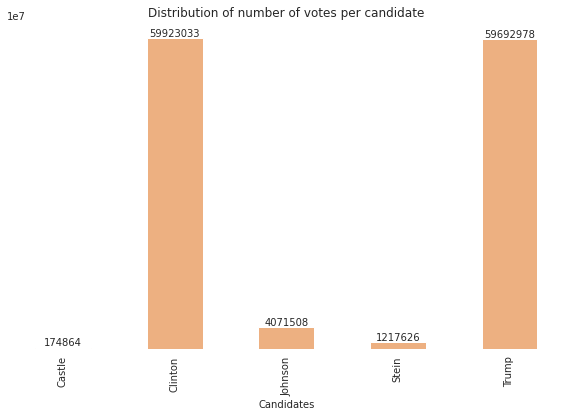

In [56]:


votecount= df.groupby(['Candidate'])['VoteCount'].sum().plot.bar(               # Grouping Candidate and VoteCount columns by the total count.
            width=0.5,
            linewidth=1,
            figsize = (10,6),
            fontsize = 10,
            cmap='flare') 
plots=votecount  

for bar in plots.patches:                                                       # Iterrating over the bars one-by-one
    plots.annotate(format(bar.get_height(), '1.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',                # ha and va stand for the horizontal and vertical alignment
                   size=10, xytext=(0, 5),
                   textcoords='offset points')
    
# Removing all ticks and label
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=True)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
votecount.set_title('Distribution of number of votes per candidate',            # setting title
                     fontsize=12)  
votecount.set_xlabel('Candidates',fontsize=10)                                  # setting x-label
votecount.set_ylabel('', fontsize=10)                                           # setting y-label
plt.grid(b=None,axis='both')                                        

## 2. What are the top 10 states?

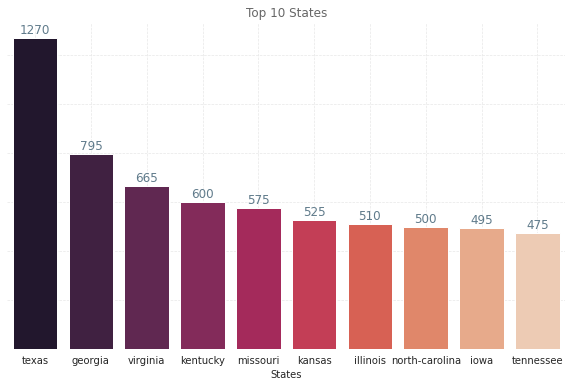

In [47]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")

# Plotting the count plot
ax=sns.countplot(x=df['StateName'],order=df['StateName'].value_counts().index[:10],palette='rocket')

#Anotate the bars with their values
for bar in ax.patches:
  ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12,color='#607B8B', 
                   xytext=(0, 8),
                   textcoords='offset points')


# Removing all ticks and label
plt.tick_params(top=False, bottom=False, left=False, right=False, 
                labelleft=False, labelbottom=True)

# Draw grid lines with red color and dashed style
plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax.set(xlabel="States", ylabel = "")
plt.title("Top 10 States",alpha=0.7)

plt.show()

## 3. What are the top 10 Counties?

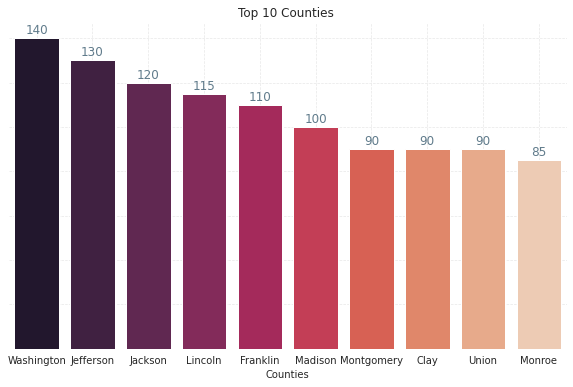

In [38]:
# Let's check the total count of each class
plt.figure(figsize=(10,6))
plt.grid(b=False,axis='both')

#Plotting the values in dependent variable
ax=sns.countplot(x="CountyName", data=df,order = df['CountyName'].value_counts().index[:10],
            palette="rocket")

#Anotate the bars with their values
for bar in ax.patches:
  ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12,color='#607B8B', 
                   xytext=(0, 8),
                   textcoords='offset points')
# Removing all ticks and label
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Draw grid lines with red color and dashed style
plt.grid(color='#E8E8E8', linestyle='--', linewidth=0.7)


ax.set(xlabel="Counties", ylabel = "")
plt.title("Top 10 Counties ")


plt.show()

## 4. What is the count of CountyFips with respect to each party?

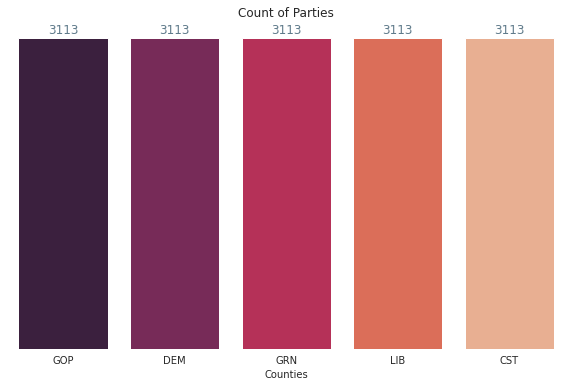

In [36]:
# Let's check the total count of each parties
plt.figure(figsize=(10,6))
plt.grid(b=False,axis='both')

#Plotting the values in dependent variable
ax=sns.countplot(x="Party", data=df,order = df['Party'].value_counts().index[:10],
            palette="rocket")

#Anotate the bars with their values
for bar in ax.patches:
  ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12,color='#607B8B', 
                   xytext=(0, 8),
                   textcoords='offset points')
# Removing all ticks and label
plt.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax.set(xlabel="Counties", ylabel = "")
plt.title("Count of Parties")


plt.show()